In [2]:
# !pip install factor_analyzer

# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt


     -------------------------------------- 41.8/41.8 kB 335.9 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------------------------------ 201.9/201.9 kB 679.8 kB/s eta 0:00:00
     ---------------------------------------- 8.8/8.8 MB 789.0 kB/s eta 0:00:00
     -------------------------------------- 98.8/98.8 kB 218.1 kB/s eta 0:00:00
     ------------------------------------ 468.5/468.5 kB 212.6 kB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42070 sha256=c36a714458667ac7ae64625e8a3a09dd208b03aaed0c5c3918cb922a43542f2b
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\6d\32\bd\460a71becd83f7d77152f

In [3]:
data = pd.read_csv('../../Data/f_win.csv')

In [5]:
data.drop(['Unnamed: 0', 'Win'], axis =1, inplace = True)

In [6]:
data.head()

,venue_code,opp_code,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,pk_rolling,pkatt_rolling
0,1,16,15,5,0.000000,3.000000,9.666667,2.333333,14.833333,0.0,0.0
1,0,5,15,5,0.333333,2.333333,12.333333,3.000000,14.133333,0.0,0.0
2,1,19,16,6,0.666667,1.666667,14.666667,3.000000,14.800000,0.0,0.0
3,0,4,17,5,1.666667,0.333333,18.333333,5.333333,18.433333,0.0,0.0
4,1,7,20,0,1.333333,0.333333,11.000000,4.000000,19.833333,0.0,0.0


In [8]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model=calculate_kmo(data)

In [9]:
kmo_model

0.6081980507871846

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [12]:
# Create factor analysis object and perform factor analysis

fa = FactorAnalyzer(n_factors=2, rotation="varimax", method="principal", is_corr_matrix=False)

In [13]:
fa.fit(data)

FactorAnalyzer(method='principal', n_factors=2, rotation='varimax',
               rotation_kwargs={})

In [14]:
print("Eigenvalues:")
print(fa.get_eigenvalues()[0])
print()
print("Communalities:")
print(fa.get_communalities())
print()
print("Specific Variances:")
print(fa.get_uniquenesses())
print()
print("Factor Loadings:")
print(fa.loadings_)

Eigenvalues:
[2.79788512 1.85569389 1.71691242 1.00247365 0.99473424 0.86560483
 0.78877336 0.44761366 0.25010504 0.18464365 0.09556013]

Communalities:
[0.01129427 0.02213267 0.25649659 0.25023673 0.6770339  0.3018054
 0.66797566 0.76179652 0.18824124 0.75595212 0.76061391]

Specific Variances:
[0.98870573 0.97786733 0.74350341 0.74976327 0.3229661  0.6981946
 0.33202434 0.23820348 0.81175876 0.24404788 0.23938609]

Factor Loadings:
[[-0.10237838  0.02851203]
 [ 0.05141912 -0.1396021 ]
 [-0.15206336  0.48308728]
 [ 0.17877044 -0.46720216]
 [ 0.81281752  0.12791242]
 [-0.5479679   0.03919926]
 [ 0.81721571 -0.01158202]
 [ 0.87237117 -0.02765958]
 [-0.36316878  0.23738087]
 [ 0.25884737  0.83003022]
 [ 0.27578384  0.82737971]]


Text(0.5, 1.0, 'Scree Plot')

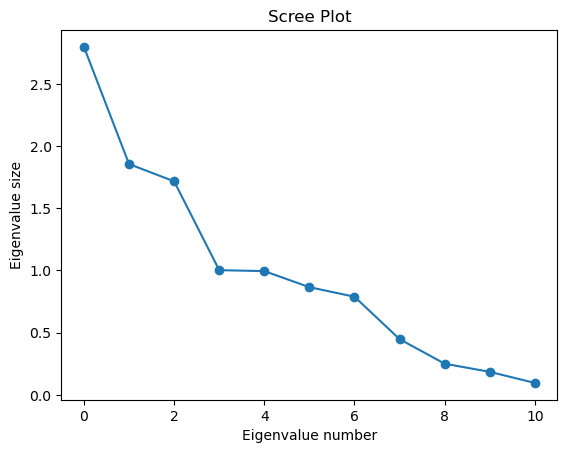

In [15]:
plt.plot(fa.get_eigenvalues()[0], marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [16]:
transformed_df = pd.DataFrame(fa.transform(data), columns=['RF1', 'RF2'])

In [17]:
transformed_df.head()

,RF1,RF2
0,-1.328561,-0.799311
1,-0.599817,-0.849709
2,-0.187977,-1.011142
3,0.897753,-0.486467
4,-0.631846,0.850744


In [21]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(data)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [25]:
factor_df= pd.DataFrame(fa.loadings_,index=data.columns)

In [26]:
factor_df

,0,1,2,3,4,5
venue_code,-0.000398,0.001357,-0.026711,0.002386,-0.106014,0.006138
opp_code,-0.038176,-0.033561,0.015526,0.005767,0.004289,0.126242
hour,0.016944,0.955195,-0.019020,0.006190,0.030485,-0.111779
day_code,0.001048,-0.777023,-0.014672,0.015427,0.048358,0.080087
gf_rolling,0.221811,-0.012547,0.400654,0.858343,0.179263,0.127444
ga_rolling,-0.069595,0.020534,-0.134405,-0.176653,-0.430042,-0.085004
sh_rolling,0.112148,0.022473,0.616109,0.129222,0.515763,0.284149
sot_rolling,0.042569,-0.011550,0.891219,0.309685,0.320868,-0.003808
dist_rolling,0.150113,0.000970,-0.044570,-0.284693,-0.308178,0.170636
pk_rolling,0.927882,0.005188,0.051398,0.073388,-0.006397,-0.117126
